<a href="https://colab.research.google.com/github/malphons/Project_Columbia_HFBootcamp/blob/main/Class_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gradient Descent

- First of all, what is gradient?
- The gradient of a differentiable function is the vector field $\nabla$ whose value at a point is the **direction and rate of fastest increase**

  - We first initialize the weights of the linear model as small values, say $\beta^0$
  - for `i` in `1:n_iterations`:
    - Calculate the cost: $RSS(\beta^i) = (y-X\beta^i)^T(y-X\beta^i)$
    - Calculate the gradient: $\nabla=\frac{\partial RSS}{\partial\beta^i} = -2X^T(y-X\beta^i)$
    - Update the value of $\beta$ by multiplying the gradient with a learning rate: $\beta^{i+1} = \beta^i - \eta\nabla$

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg"  width="600" height="400">
</center>

<center>Image from Wikipedia</center>

### Normalize the data

- In order to keep all the features at the same scale, we can normalize or min-max scale our dataset.

$$X\_new = \frac{X\ -\ X\_min}{X\_max - X\_min}$$

- This scales the range to $[0, 1]$. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

### How to pick the best alpha for ridge/lasso?

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
rsquared = []
alphas = np.arange(0, 1, 0.01)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    rsquared.append(ridge.score(X_test, y_test))

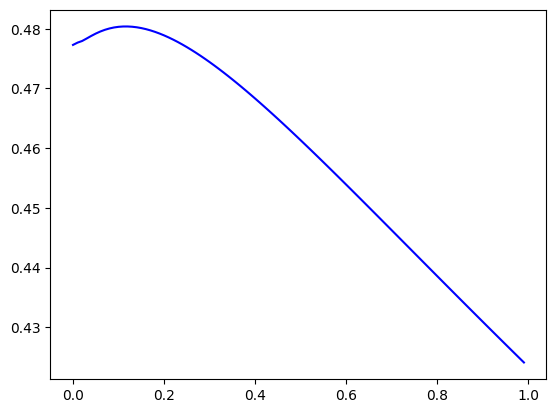

In [ ]:
import matplotlib.pyplot as plt

best_alpha = np.argmax(rsquared)

plt.plot(alphas, rsquared, 'b')
plt.show()

### Logistic Regression

- Assuming we have a dataset of tumor sizes, we would like to predict whether a tumor is maligant or benign based on the size.
- The output is binary:
  - 0: benign
  - 1: malignant
- Can we use Linear Regression for this task?

- Since the output of linear regression model is continuous, we may then set a threshold on the predicted value:
  - Predict 1 if $\hat{y}\ge0.5$.
  - Predict 0 if $\hat{y}\lt0.5$.
-  The predicted values become binary:

![alt](https://drive.google.com/uc?export=view&id=1-_N6OTqlV3XU89HIYZLPFGEtx_E0JkfH)

**Issues with Linear Regression:**

- At first glance it looks like the result of the binary prediction with linear regression is not so bad. However, we do have the following two problems:

 - the continuous output exceeds the interval [0, 1]. Therefore we cannot interpret it as probability.
 - the prediction can be affected by outliers easily.

- Is there any function that can transform any real value into the range of $[0, 1]$?
- Yes! It is called **Sigmoid Function**: a monotonically increasing smooth function which transforms an arbitrary real value to a value bounded between 0 and 1.

$$
S(t)=\frac{e^t}{1+e^t}=\frac{1}{1+e^{-t}}
$$

<center>$e\approx2.71828$ is a mathematical constant Euler’s number</center>

![alt](https://drive.google.com/uc?export=view&id=1Eaxw5duVNoPcjAuG0w2fWgx6k82kywSr)

- Logistic regression, despite its name, is a linear model for **classification** rather than regression.

- Idea: if we transform the values of the linear function $\beta_0+\beta_1X$ using the Sigmoid function $S(t)$, then no matter what values $\beta_0$, $\beta_1$ or $X$ take, the transformed $y$ will always have values between 0 and 1.

- Logistic Regression models use the following equation to estimate the probability that $y = 1$ given its size $X$:

$$
Pr(Y=1|X=x)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$
$$
Pr(Y=0|X=x)=1-Pr(Y=1|X=x)=\frac{1}{1+e^{\beta_0+\beta_1X}}
$$

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [ ]:
X[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [ ]:
print(y[0], y[51], y[101])

0 1 2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logit.score(X_test, y_test)

0.8222222222222222